In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
sales=pd.read_csv('saless.csv')

In [3]:
sales.head(2)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0


In [4]:
sales.tail(2)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
sales.columns=['month','sales']

In [6]:
sales.isnull().sum()

month    1
sales    2
dtype: int64

In [7]:

sales.drop(105,axis=0,inplace=True)

In [8]:
sales.drop(106,axis=0,inplace=True)

In [9]:
sales.tail(2)

,month,sales
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
#convert month into a date and time
sales['month']=pd.to_datetime(sales['month'])

In [11]:
from datetime import datetime

In [12]:
sales.set_index('month',inplace=True)

In [13]:
sales.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


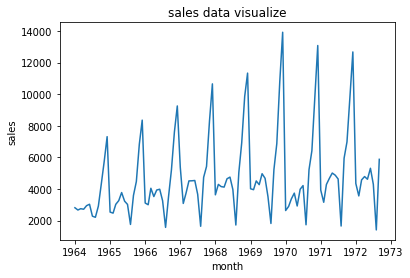

In [15]:
plt.xlabel('month')
plt.ylabel('sales')
plt.title('sales data visualize')
plt.plot(sales)

In [19]:
sales.head(2)

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0


In [28]:
#checking statinority using rolling stats window =12 mean check statornirty month by month
rolemean=sales.rolling(window=12).mean()
rolestd=sales.rolling(window=12).std()

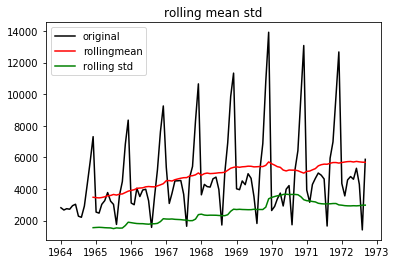

In [29]:
#check stationrity using rolemean
original=plt.plot(sales,color='black',label='original')
mean=plt.plot(rolemean,color='red',label='rollingmean')
std=plt.plot(rolestd,color='green',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean std')
plt.show(block=False)

In [31]:
#check statonrity using dicky folller test
from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm

In [33]:
sales.head(1)

,sales
month,
1964-01-01,2815.0


In [39]:
print('print the dicky foller test')
dfuller=adfuller(sales['sales'],autolag='AIC')
output=pd.Series(dfuller[0:4],index=['Adf test','p-value','number of observatio used','#lagsused'])
for key,value in dfuller[4].items():
    output['critical value (%s)'%key]=value
print(output)

print the dicky foller test
Adf test                     -1.833593
p-value                       0.363916
number of observatio used    11.000000
#lagsused                    93.000000
critical value (1%)          -3.502705
critical value (5%)          -2.893158
critical value (10%)         -2.583637
dtype: float64


C:\Users\Raghav Jha\Anaco\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


[<matplotlib.lines.Line2D at 0x1337890>, <matplotlib.lines.Line2D at 0xe8dab0>]

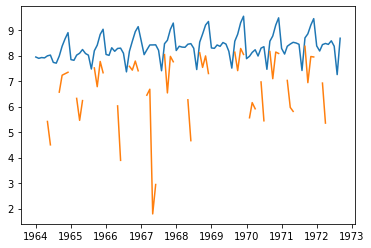

In [44]:
#estimatig at log scale
saleslogscale=np.log(sales)
plt.plot(saleslogscale)

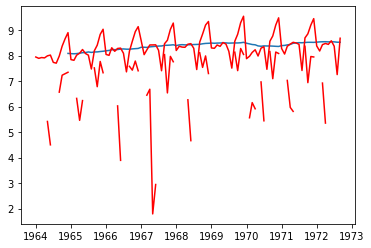

In [50]:
#moving avg
movingavg=saleslogscale.rolling(window=12).mean()
movingstd=saleslogscale.rolling(window=12).std()
plt.plot(movingavg)
plt.plot(saleslogscale,color='red')

In [42]:
sales['sales first differnce']=sales['sales']-sales['sales'].shift(1)

In [43]:
sales['sales'].shift(1)

month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [51]:
sales['sales'].shift(1)

month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [52]:
sales['sesonal first difference']=sales['sales']-sales['sales'].shift(12)

In [55]:
#test dicky fuller test
adfuller(sales['seasonal first difference'].dropna())

KeyError: 'seasonal first difference'